In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3c16c684f83051c3c43480e860fd86c


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shimoda
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | puerto montt
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | pokrovsk
Processing Record 7 of Set 1 | sarkand
Processing Record 8 of Set 1 | sanchursk
Processing Record 9 of Set 1 | emporia
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | mocuba
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | albany
Pro

Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | khani
Processing Record 40 of Set 4 | chirongui
Processing Record 41 of Set 4 | tarko-sale
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | sibu
Processing Record 44 of Set 4 | fershampenuaz
Processing Record 45 of Set 4 | jaumave
Processing Record 46 of Set 4 | novyy urgal
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | antofagasta
Processing Record 49 of Set 4 | anloga
Processing Record 50 of Set 4 | zhangjiakou
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | danane
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | bantry
Processing Record 5 of Set 5 | ciudad guayana
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | naushki
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | antalaha
Process

Processing Record 25 of Set 8 | chernyshevskiy
Processing Record 26 of Set 8 | sobolevo
Processing Record 27 of Set 8 | kurya
Processing Record 28 of Set 8 | beyneu
Processing Record 29 of Set 8 | siguiri
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | lilongwe
Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | gilgit
Processing Record 34 of Set 8 | cabra
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | augusta
Processing Record 37 of Set 8 | troitsko-pechorsk
Processing Record 38 of Set 8 | langsa
Processing Record 39 of Set 8 | salo
Processing Record 40 of Set 8 | taksimo
Processing Record 41 of Set 8 | alyangula
Processing Record 42 of Set 8 | san francisco menendez
Processing Record 43 of Set 8 | ayna
Processing Record 44 of Set 8 | manbij
Processing Record 45 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 46 of Set 8 | del rio
Processing Record 47 of Set 8 | jalpan
Processing Record 48 of Set 8 

Processing Record 14 of Set 12 | amapa
Processing Record 15 of Set 12 | tilichiki
Processing Record 16 of Set 12 | arlit
Processing Record 17 of Set 12 | el alto
Processing Record 18 of Set 12 | tshikapa
Processing Record 19 of Set 12 | gilbues
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | bulawayo
Processing Record 22 of Set 12 | guilin
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | buin
Processing Record 25 of Set 12 | faridan
City not found. Skipping...
Processing Record 26 of Set 12 | bogorodskoye
Processing Record 27 of Set 12 | shimanovsk
Processing Record 28 of Set 12 | manado
Processing Record 29 of Set 12 | ilam
Processing Record 30 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 31 of Set 12 | bonavista
Processing Record 32 of Set 12 | yasnyy
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 12 | roebourne
Processing Record 35 of S

In [9]:
len(city_data)

576

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shimoda,34.6667,138.9500,77.11,89,61,10.18,JP,2022-08-03 20:28:07
1,Severo-Kurilsk,50.6789,156.1250,52.84,86,43,7.38,RU,2022-08-03 20:23:59
2,Jamestown,42.0970,-79.2353,89.94,39,1,8.99,US,2022-08-03 20:23:17
3,Puerto Montt,-41.4698,-72.9447,45.43,100,100,9.22,CL,2022-08-03 20:27:37
4,Port Alfred,-33.5906,26.8910,62.19,80,51,1.99,ZA,2022-08-03 20:28:07
5,Pokrovsk,48.2820,37.1758,67.15,86,13,9.89,UA,2022-08-03 20:28:08
6,Sarkand,45.4100,79.9186,68.16,47,30,6.06,KZ,2022-08-03 20:28:08
7,Sanchursk,56.9413,47.2499,65.16,80,50,2.71,RU,2022-08-03 20:28:08
8,Emporia,38.4039,-96.1817,97.00,46,20,6.91,US,2022-08-03 20:24:58
9,Kavieng,-2.5744,150.7967,81.86,80,96,17.22,PG,2022-08-03 20:28:09


In [11]:
#re-order the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimoda,JP,2022-08-03 20:28:07,34.6667,138.9500,77.11,89,61,10.18
1,Severo-Kurilsk,RU,2022-08-03 20:23:59,50.6789,156.1250,52.84,86,43,7.38
2,Jamestown,US,2022-08-03 20:23:17,42.0970,-79.2353,89.94,39,1,8.99
3,Puerto Montt,CL,2022-08-03 20:27:37,-41.4698,-72.9447,45.43,100,100,9.22
4,Port Alfred,ZA,2022-08-03 20:28:07,-33.5906,26.8910,62.19,80,51,1.99


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

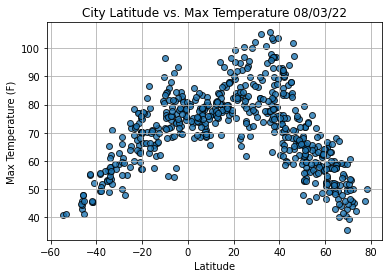

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

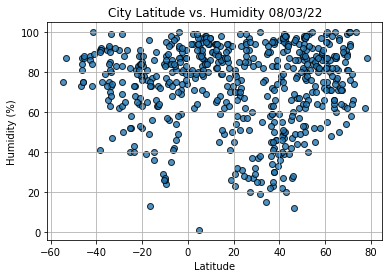

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

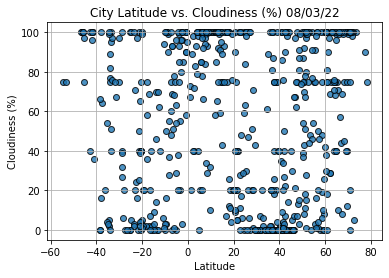

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

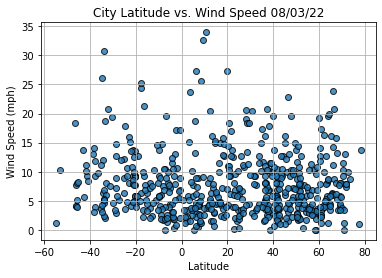

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-08-03 20:28:10
Lat                      -37.6167
Lng                        -73.65
Max Temp                    51.73
Humidity                       75
Cloudiness                     64
Wind Speed                   3.98
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

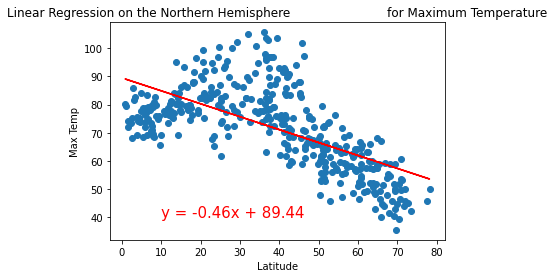

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

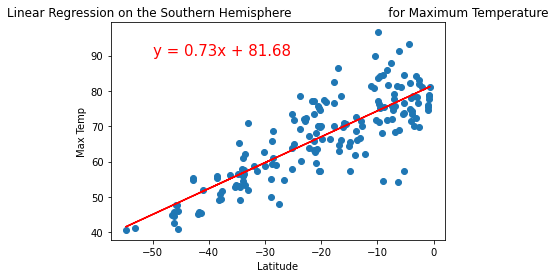

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

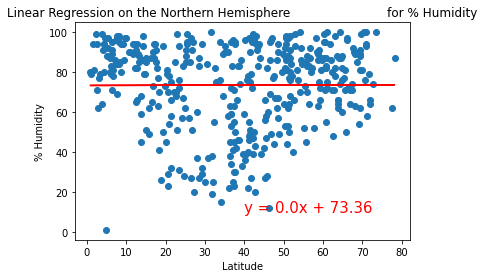

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

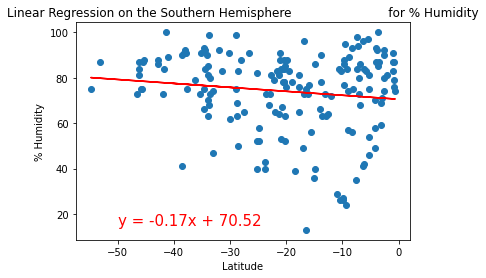

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

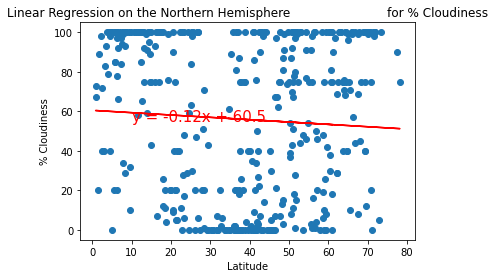

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

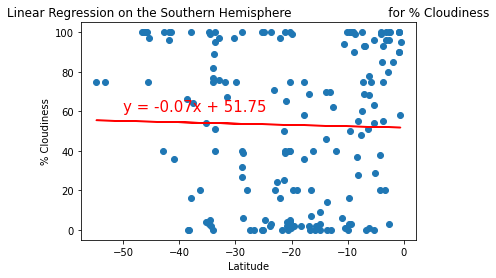

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

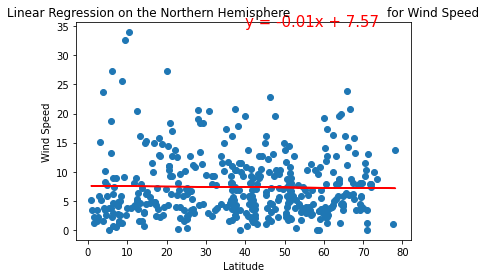

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


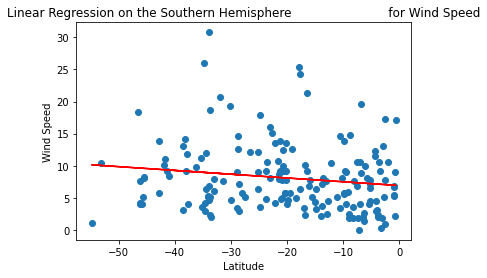

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")